In [145]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import numpy.linalg as npl
import numpy.random as npr


import scipy.linalg as la


from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans

import cvxpy as cp
from cvxpylayers.torch import CvxpyLayer

import matplotlib.pyplot as plt

import pandas as pd

from pathlib import Path  

import sys
import time
output_stream = sys.stdout

import gurobipy as gp
from gurobipy import GRB

import time
colors = ["tab:blue", "tab:orange", "tab:green",
          "tab:red", "tab:purple", "tab:brown", "tab:pink", "tab:grey", "tab:olive","tab:blue", "tab:orange", "tab:green",
          "tab:red", "tab:purple", "tab:brown", "tab:pink", "tab:grey", "tab:olive"] 

In [155]:
x_sols = np.load("q_sols.npy") 
Opt_vals = np.load("Opt_vals.npy")
probs= np.load("probs.npy")
setuptimes = np.load("setuptimes.npy")
solvetimes = np.load("solvetimes.npy")
clustertimes = np.load("clustertimes.npy")

Opt_vals = Opt_vals/10

In [149]:
x_sols1 = np.load("../m500_K2000_r20/q_sols.npy") 
Opt_vals1 = np.load("../m500_K2000_r20/Opt_vals.npy")
probs1= np.load("../m500_K2000_r20/probs.npy")
setuptimes1 = np.load("../m500_K2000_r20/setuptimes.npy")
solvetimes1 = np.load("../m500_K2000_r20/solvetimes.npy")
clustertimes1 = np.load("../m500_K2000_r20/clustertimes.npy")

Opt_vals1 = Opt_vals1/10
#Opt_vals1 = np.delete(Opt_vals1,1,axis=0)
#Opt_vals1 = np.delete(Opt_vals1,2,axis=0)

In [150]:
K_nums1 = np.array([1,10,50,100,500,1000,2000])
#K_nums1 = np.array([1,50,500,1000,2000])
K_tot1 = K_nums.size  # Total number of clusters we consider
N_tot1 = 2000
M1 = 10
R1 = 20
m1 = 500
eps_min = -5    # minimum epsilon we consider
eps_max = 0        # maximum epsilon we consider
eps_nums1 = np.linspace(eps_min,eps_max,M)
eps_nums1 = 10**(eps_nums1)
eps_tot1 = M

In [157]:
x_sols = np.delete(x_sols,1,axis = 0)
Opt_vals = np.delete(Opt_vals,1,axis = 0)
probs = np.delete(probs,1,axis = 0)
setuptimes = np.delete(setuptimes,1,axis = 0)
solvetimes = np.delete(solvetimes,1,axis = 0)
clustertimes = np.delete(clustertimes,1,axis = 0)

In [151]:
K_nums = np.array([1,50,100,300,500])
K_tot = K_nums.size  # Total number of clusters we consider
N_tot = 500
M = 10
R = 20
m = 40
eps_min = -3    # minimum epsilon we consider
eps_max = 0        # maximum epsilon we consider
eps_nums = np.linspace(eps_min,eps_max,M)
eps_nums = 10**(eps_nums)
eps_tot = M

In [104]:
xcount = np.zeros((K_tot, eps_tot,R))
for r in range(R):
    for K in range(K_tot):
        for eps in range(eps_tot):
            xcount[K,eps,r] = sum(x_sols[K,eps,:,r] > 0.001)

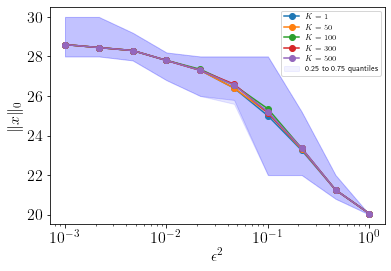

In [105]:
plt.figure(figsize=(6, 4))
labelprint = 1

for K_count, K in enumerate(K_nums):
    if labelprint== 1:
        plt.fill_between(eps_nums, np.quantile(xcount[K_count],0.2,axis=1), np.quantile(xcount[K_count],0.8,axis=1), color = "blue", alpha = 0.05, label = "0.25 to 0.75 quantiles")
    else:
        plt.fill_between(eps_nums, np.quantile(xcount[K_count],0.2,axis=1), np.quantile(xcount[K_count],0.8,axis=1), color = "blue", alpha = 0.05)
    labelprint = 0
    plt.plot(eps_nums, np.mean(xcount[K_count],axis = 1), linestyle='-', marker='o', label = "$K = {}$".format(round(K,4)))
plt.legend(fontsize = 7.5)
plt.xlabel("$\epsilon^2$")
plt.xscale("log")
plt.ylabel("$\|x\|_0$")
#plt.title("Cardinality of portfolio vs. level of conservatism")
plt.savefig("Cardinalityfacility.pdf")
plt.show()


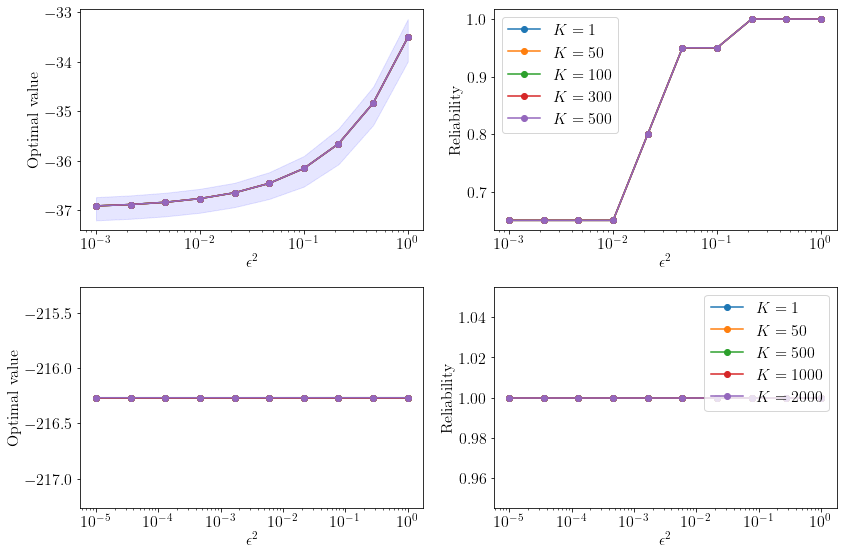

In [137]:
plt.rcParams.update({
    "text.usetex": True,
    "font.size": 16,
    'xtick.labelsize': 16,
    'ytick.labelsize': 16,
    "font.family" : "serif"
})
import matplotlib.gridspec as gridspec

#fig, (ax1, ax2,ax3) = plt.subplots(1, 2, figsize=(12, 8))
plt.figure(figsize=(12, 8))

gs = gridspec.GridSpec(4, 4)
ax1 = plt.subplot(gs[:2, :2])
ax2 = plt.subplot(gs[:2, 2:])
ax3 = plt.subplot(gs[2:4, :2])
ax4 = plt.subplot(gs[2:4, 2:])

labelprint = 1
for K_count, K in enumerate(K_nums):
    if labelprint== 1:
        ax1.fill_between(eps_nums[:], np.quantile(Opt_vals[:,:,:],0.25,axis = 2)[K_count,:], np.quantile(Opt_vals[:,:,:],0.75,axis = 2)[K_count,:], color = "blue", alpha = 0.02, label = "0.25 to 0.75 quantiles")
    else: 
        ax1.fill_between(eps_nums[:], np.quantile(Opt_vals[:,:,:],0.25,axis = 2)[K_count,:], np.quantile(Opt_vals[:,:,:],0.75,axis = 2)[K_count,:], color = "blue", alpha = 0.02)
    labelprint = 0
    ax1.plot(eps_nums[:], np.mean(Opt_vals[:,:,:],axis = 2)[K_count,:],linestyle='-', marker='o', color = colors[K_count], label = "$K = {}$".format(round(K,4)))
ax1.set_xlabel("$\epsilon^2$")
ax1.set_xscale("log")
ax1.set_ylabel("Optimal value")


for K_count, K in enumerate(K_nums):
    ax2.plot(eps_nums[:], np.mean(probs[:,:,:],axis = 2)[K_count,:],linestyle='-', marker='o', color = colors[K_count], label = "$K = {}$".format(round(K,4)))
ax2.set_xlabel("$\epsilon^2$")
ax2.set_xscale("log")
ax2.set_ylabel("Reliability")
ax2.legend()

labelprint = 1
for K_count, K in enumerate(K_nums1):
    if labelprint== 1:
        ax3.fill_between(eps_nums1[:], np.quantile(Opt_vals1[:,:,:],0.25,axis = 2)[K_count,:], np.quantile(Opt_vals1[:,:,:],0.75,axis = 2)[K_count,:], color = "blue", alpha = 0.02, label = "0.25 to 0.75 quantiles")
    else: 
        ax3.fill_between(eps_nums1[:], np.quantile(Opt_vals1[:,:,:],0.25,axis = 2)[K_count,:], np.quantile(Opt_vals1[:,:,:],0.75,axis = 2)[K_count,:], color = "blue", alpha = 0.02)
    labelprint = 0
    ax3.plot(eps_nums1[:], np.mean(Opt_vals1[:,:,:],axis = 2)[K_count,:],linestyle='-', marker='o', color = colors[K_count], label = "$K = {}$".format(round(K,4)))
ax3.set_xlabel("$\epsilon^2$")
ax3.set_xscale("log")
ax3.set_ylim([Opt_vals1[0,0,0]-1,Opt_vals1[0,0,0]+1])

ax3.set_ylabel("Optimal value")


for K_count, K in enumerate(K_nums1):
    ax4.plot(eps_nums1[:], np.mean(probs1[:,:,:],axis = 2)[K_count,:],linestyle='-', marker='o', color = colors[K_count], label = "$K = {}$".format(round(K,4)))
ax4.set_xlabel("$\epsilon^2$")
ax4.set_xscale("log")
ax4.set_ylabel("Reliability")
ax4.legend()


plt.tight_layout()


plt.savefig("newscontop.pdf")
plt.show()



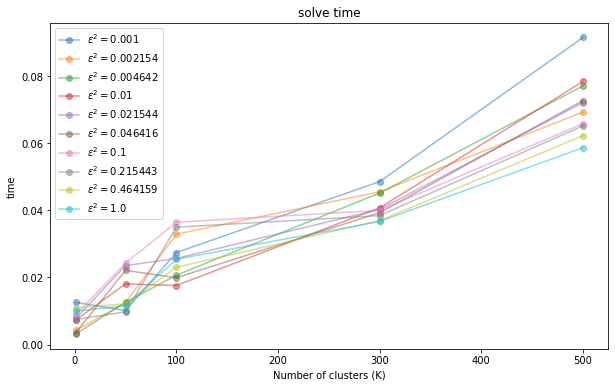

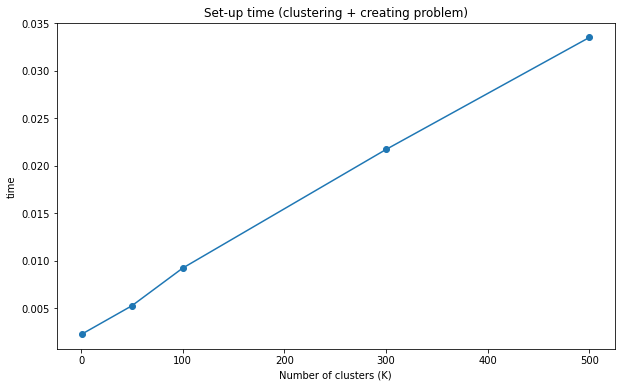

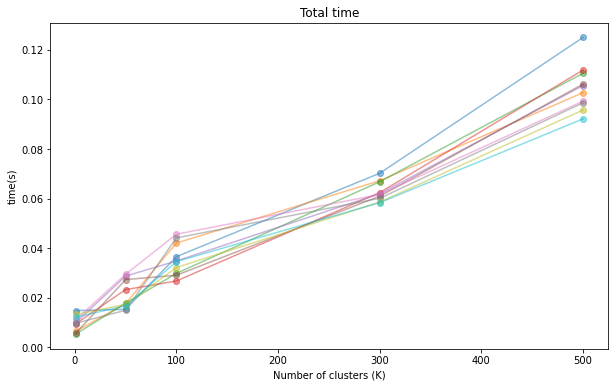

In [53]:
plt.figure(figsize=(10, 6))
for eps_count, eps in enumerate(eps_nums):
    plt.plot(K_nums,np.mean(solvetimes[:,:,:],axis = 2)[:,eps_count],linestyle='-', marker='o', label = "$\epsilon^2 = {}$".format(round(eps,6)), alpha = 0.5)
    plt.xlabel("Number of clusters (K)")

plt.ylabel("time")
plt.title("solve time")
#plt.yscale("log")
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(K_nums,np.mean(setuptimes,axis = 1),linestyle='-', marker='o')
plt.xlabel("Number of clusters (K)")
plt.ylabel("time")
plt.title("Set-up time (clustering + creating problem)")
plt.show()

plt.figure(figsize=(10, 6))
for eps_count, eps in enumerate(eps_nums):
    plt.plot(K_nums[:],np.mean(setuptimes[:,:],axis = 1) + np.mean(solvetimes[:,:,:],axis = 2)[:,eps_count],linestyle='-', marker='o', label = "$\epsilon^2 = {}$".format(round(eps,6)), alpha = 0.5)
    plt.xlabel("Number of clusters (K)")

plt.ylabel("time(s)")
plt.title("Total time")
#plt.yscale("log")
#plt.legend(fontsize=6)
plt.show()

<Figure size 864x360 with 0 Axes>

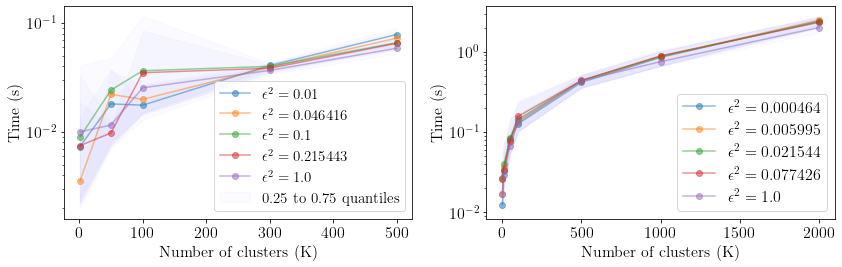

In [158]:
plt.figure(figsize=(12, 5))
labelprint = 1
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
for eps_count in [3,5,6,7,9]:
    if labelprint== 1:
        ax1.fill_between(K_nums[:], np.quantile(solvetimes[:,:,:],0.1,axis = 2)[:,eps_count], np.quantile(solvetimes[:,:,:],0.9,axis = 2)[:,eps_count], color = "b", alpha = 0.02, label = "0.25 to 0.75 quantiles")
        labelprint = 0
    else:
        ax1.fill_between(K_nums[:],np.quantile(solvetimes[:,:,:],0.1,axis = 2)[:,eps_count], np.quantile(solvetimes[:,:,:],0.9,axis = 2)[:,eps_count], color = "b", alpha = 0.02)
for eps_count in [3,5,6,7,9]:
    ax1.plot(K_nums[:],np.mean(solvetimes[:,:,:],axis = 2)[:,eps_count],linestyle='-', marker='o', label = "$\epsilon^2 = {}$".format(round(eps_nums[eps_count],6)), alpha = 0.5)

ax1.set_xlabel("Number of clusters (K)")
ax1.set_ylabel("Time (s)")
#plt.title("Total time")
ax1.set_yscale("log")
#plt.ylim([-0.1,10.1])
ax1.legend(fontsize = 15)

for eps_count in [3,5,6,7,9]:
    if labelprint== 1:
        ax2.fill_between(K_nums1[:],np.quantile(solvetimes1[:,:,:],0.1,axis = 2)[:,eps_count],  np.quantile(solvetimes1[:,:,:],0.9,axis = 2)[:,eps_count], color = "b", alpha = 0.02, label = "0.25 to 0.75 quantiles")
        labelprint = 0
    else:
        ax2.fill_between(K_nums1[:],np.quantile(solvetimes1[:,:,:],0.1,axis = 2)[:,eps_count], np.quantile(solvetimes1[:,:,:],0.9,axis = 2)[:,eps_count], color = "b", alpha = 0.02)
for eps_count in [3,5,6,7,9]:
    ax2.plot(K_nums1[:],np.mean(solvetimes1[:,:,:],axis = 2)[:,eps_count],linestyle='-', marker='o', label = "$\epsilon^2 = {}$".format(round(eps_nums1[eps_count],6)), alpha = 0.5)

ax2.set_xlabel("Number of clusters (K)")
ax2.set_ylabel("Time (s)")
#plt.title("Total time")
ax2.set_yscale("log")
#plt.ylim([-0.1,10.1])
ax2.legend()
plt.tight_layout()

plt.savefig("newsconttotaltime.pdf")
plt.show()


In [24]:
eps_min = -6    # minimum epsilon we consider
eps_max = -4.2      # maximum epsilon we consider
eps_nums = np.linspace(eps_min,eps_max,10)
eps_nums = 10**(eps_nums)
eps_tot = 10

In [149]:
eps_nums

array([1.00000000e-06, 1.58489319e-06, 2.51188643e-06, 3.98107171e-06,
       6.30957344e-06, 1.00000000e-05, 1.58489319e-05, 2.51188643e-05,
       3.98107171e-05, 6.30957344e-05])